$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

## Motivation and Setup

Linear function approximator as a neural network.

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnlinear.png">

What must we add to do logistic regression?

Just add the softmax calculation to the output layer. 

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="http://www.cs.colostate.edu/~anderson/cs545/notebooks/nntwolayerlogisticregression.png">


## Derivation

We will maximize the log likelihood of the training data.
$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$



## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our previous neural network lectures.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Two-Dimensional Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

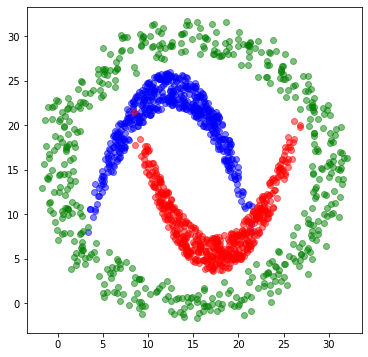

In [2]:
n = 500
x1 = np.linspace(5,20,n) + np.random.uniform(-2,2,n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2,2,n)
x2 = np.linspace(10,25,n) + np.random.uniform(-2,2,n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2,2,n)
angles = np.linspace(0,2*np.pi,n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2,2,n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2,2,n)
X =  np.vstack((np.hstack((x1,x2,x3)), np.hstack((y1,y2,y3)))).T
T = np.repeat(range(1,4),n).reshape((-1,1))
colors = ['blue','red','green']
plt.figure(figsize=(6,6))
for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.  In Python, do this by defining a new class *NeuralNetClassifier* it is easy to create a new class for using a neural network
as a classifier by making a subclass *NeuralNetworkClassifier* of the
*NeuralNetwork* and make the required changes, as required for your A3 assignment.

Assume you have completed this and have saved your new class in the `neuralnetworks.py` python source file, which now contains classes `NeuralNetwork` and `NeuralNetworkClassifer`.

In [3]:
import neuralnetworks_hide as nn

SCG: Iteration 100 ObjectiveF=0.90471 Scale=1.000e-15 Seconds=0.185
SCG: Iteration 200 ObjectiveF=0.92342 Scale=1.000e-15 Seconds=0.183
SCG: Iteration 300 ObjectiveF=0.92738 Scale=1.000e-15 Seconds=0.191
SCG: Iteration 400 ObjectiveF=0.93085 Scale=1.000e-15 Seconds=0.177
SCG: Iteration 500 ObjectiveF=0.94227 Scale=1.000e-15 Seconds=0.182
SCG: Iteration 600 ObjectiveF=0.94268 Scale=1.000e-15 Seconds=0.177
SCG: Iteration 700 ObjectiveF=0.94522 Scale=1.000e-15 Seconds=0.179
SCG: Iteration 800 ObjectiveF=0.94745 Scale=1.000e-15 Seconds=0.184
SCG: Iteration 900 ObjectiveF=0.95248 Scale=1.000e-15 Seconds=0.183
SCG: Iteration 1000 ObjectiveF=0.95663 Scale=1.000e-15 Seconds=0.182


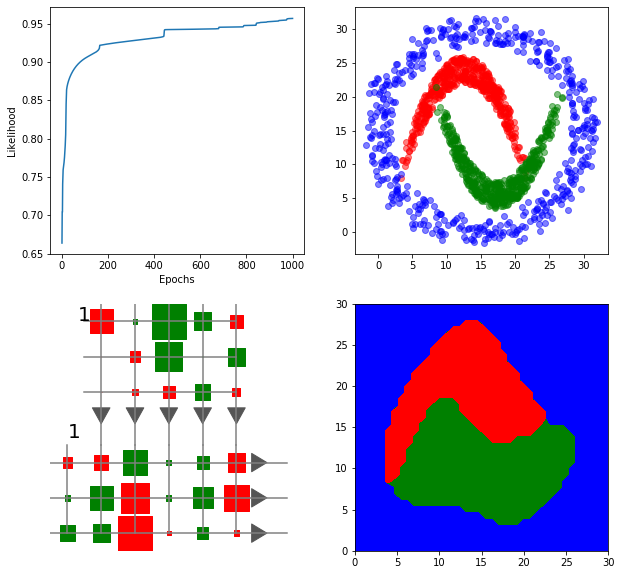

In [4]:
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

## if you edit neuralnetwork.py, force ipython to reload it by doing this.
# from imp import reload
# reload(nn)

n_hiddens_list = [5]
nnet = nn.NeuralNetworkClassifier(2, n_hiddens_list, classes=[1, 2, 3]) # 3 classes, will actually make 2-unit output layer
nnet.train(X, T,n_epochs=1000, verbose=True)

xs = np.linspace(0, 30, 40)
x,y = np.meshgrid(xs, xs)
Xtest = np.vstack((x.flat, y.flat)).T
Ytest = nnet.use(Xtest)
predTest, probs,_ = nnet.use(Xtest, all_outputs=True)  #discard hidden unit outputs

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(nnet.get_error_trace())
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

plt.subplot(2, 2, 3)
nnet.draw()

colors = ['red', 'green', 'blue']
plt.subplot(2, 2, 2)

for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6, alpha=0.5, color=colors[c - 1])

plt.subplot(2, 2, 4)
plt.contourf(Xtest[:, 0].reshape((40, 40)),Xtest[:, 1].reshape((40, 40)), predTest.reshape((40, 40)),
             levels = [0.5, 1.99, 2.01, 3.5], #    levels=(0.5,1.5,2.5,3.5),
             colors=('red', 'green', 'blue'));

In [5]:
from matplotlib.colors import LightSource

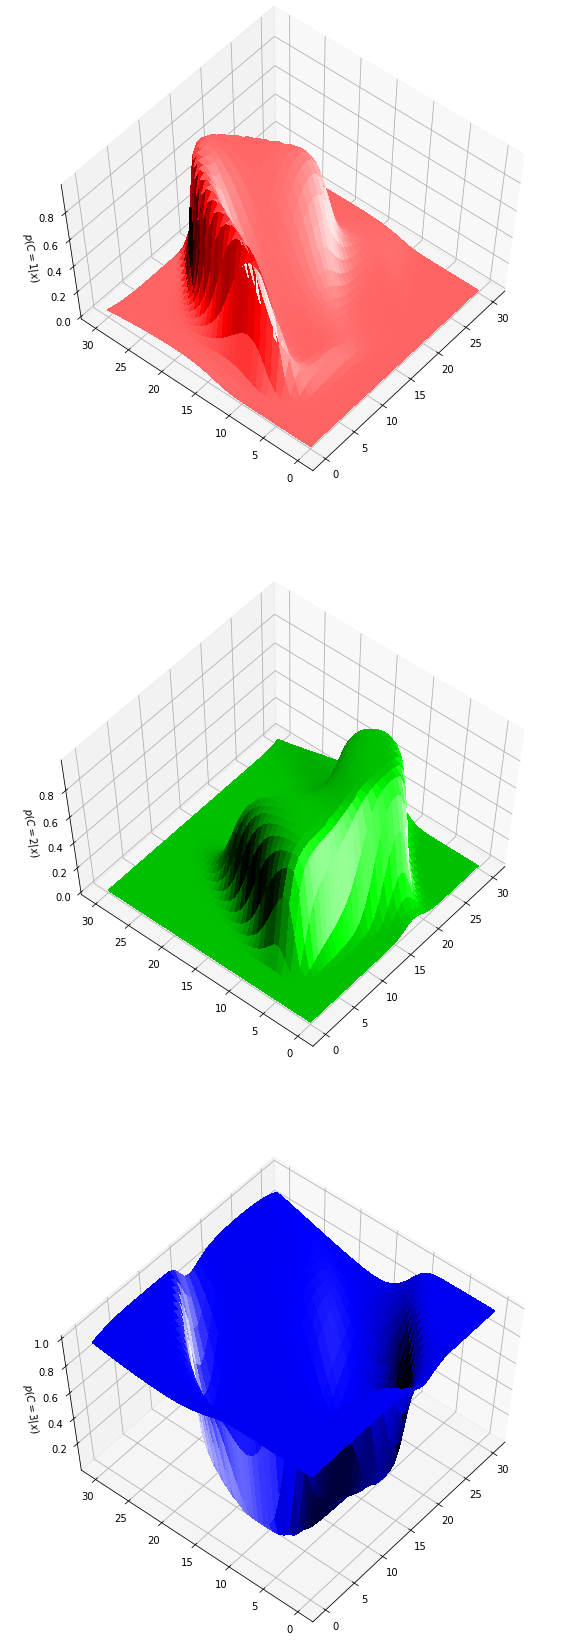

In [6]:
fig = plt.figure(figsize=(10, 30))
ls = LightSource(azdeg=30, altdeg=60)
white = np.ones((x.shape[0], x.shape[1], 3))
red = white * np.array([1, 0, 0])
green = white * np.array([0, 1, 0])
blue = white * np.array([0, 0, 1])
colors = [red, green, blue]

for c in range(3):
    ax = fig.add_subplot(3, 1, c + 1, projection='3d')
    ax.view_init(azim=180 + 40, elev=60)
    Z = probs[:, c].reshape(x.shape)
    rgb = ls.shade_rgb(colors[c], Z, vert_exag=0.1)
    ax.plot_surface(x, y, Z,
                    rstride=1, cstride=1, linewidth=0, antialiased=False,
                    shade=False, facecolors=rgb)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units?

Let's repeat the experiment with classifying human activity data (accelerometer data), but now use our *NeuralNetworkClassifier* class to do nonlinear logistic regression.  This time we will retrieve and load [accelerometers.npy](https://www.cs.colostate.edu/~anderson/cs545/notebooks/accelerometers.npy), a file containing a *numpy* array stored in its binary format.

In [7]:
data = np.load('accelerometers.npy')

In [8]:
data.shape

(225006, 4)

In [9]:
data[0,:]

array([ 1.        , -0.87313405, -0.08552787, -0.29504612])

In [10]:
X = data[:, 1:]
T = data[:, 0:1]
X.shape, T.shape

((225006, 3), (225006, 1))

Download [mlutilities.zip](https://www.cs.colostate.edu/~anderson/cs545/notebooks/mlutilties.zip) and unzip it.

In [11]:
import mlutilities as ml # for ml.paritition

In [12]:
X.shape

(225006, 3)

In [18]:
train_fraction = [0.8, 0.2]
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, train_fraction, classification=True) #stratified partitioning (by class)

In [19]:
Xtrain.shape,Ttrain.shape,Xtest.shape,Ttest.shape

((180006, 3), (180006, 1), (45000, 3), (45000, 1))

In [20]:
np.unique(Ttrain, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([18002, 18000, 18000, 18000, 18000, 18002, 18000, 18000, 18002,
        18000]))

In [21]:
%precision 5
values,counts = np.unique(Ttrain, return_counts=True)
counts / Ttrain.shape[0]

array([0.10001, 0.1    , 0.1    , 0.1    , 0.1    , 0.10001, 0.1    ,
       0.1    , 0.10001, 0.1    ])

In [22]:
values,counts = np.unique(Ttest, return_counts=True)
counts / Ttest.shape[0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

SCG: Iteration 10 ObjectiveF=0.83580 Scale=1.953e-09 Seconds=1.570
SCG: Iteration 20 ObjectiveF=0.84296 Scale=1.907e-12 Seconds=1.529
SCG: Iteration 30 ObjectiveF=0.85109 Scale=1.863e-15 Seconds=1.533
SCG: Iteration 40 ObjectiveF=0.86070 Scale=1.000e-15 Seconds=1.542
SCG: Iteration 50 ObjectiveF=0.86183 Scale=1.000e-15 Seconds=1.533
SCG: Iteration 60 ObjectiveF=0.86349 Scale=1.000e-15 Seconds=1.538
SCG: Iteration 70 ObjectiveF=0.87041 Scale=1.000e-15 Seconds=1.547
SCG: Iteration 80 ObjectiveF=0.87098 Scale=1.000e-15 Seconds=1.540
SCG: Iteration 90 ObjectiveF=0.87297 Scale=1.000e-15 Seconds=1.527
SCG: Iteration 100 ObjectiveF=0.87406 Scale=1.000e-15 Seconds=1.548


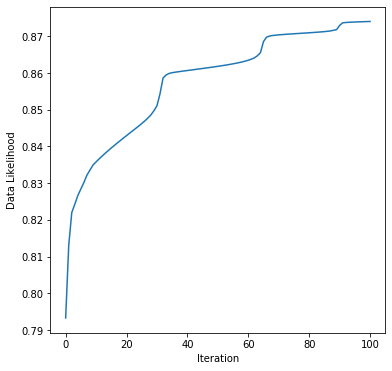

In [23]:
n_classes = len(np.unique(T))
nnet = nn.NeuralNetworkClassifier(3, [10], classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
nnet.train(Xtrain, Ttrain, n_epochs=100, verbose=True)

plt.rcParams['figure.figsize'] = (6, 6)
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

/s/parsons/e/fac/anderson/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/s/parsons/e/fac/anderson/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


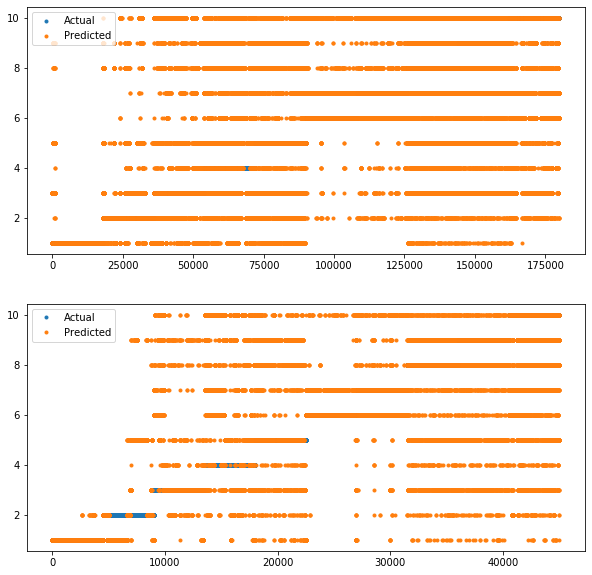

In [24]:
Ptrain, Prtrain, _ = nnet.use(Xtrain, all_outputs=True)
Ptest, Prtest, _ = nnet.use(Xtest, all_outputs=True)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(np.hstack((Ttrain, Ptrain)), '.')
plt.legend(('Actual','Predicted'))
plt.subplot(2, 1, 2)
plt.plot(np.hstack((Ttest, Ptest)), '.')
plt.legend(('Actual','Predicted'));


In [26]:
cm = ml.confusionMatrix(Ttest, Ptest, np.unique(Ttest).astype(int))
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 99.1  0.9  0    0    0    0    0    0    0    0     (4500 / 4500)
 2 | 40.4 24.4  3.4  0.0 28.2  0    0    0.1  3.3  0     (4500 / 4500)
 3 |  1.3  2.3 69.2  2.1  4.3 10.5  3.5  1.8  3.5  1.6   (4500 / 4500)
 4 |  1.1  5.1 13.7  9.8 21.1 18.4  8.9  4.4  5.0 12.7   (4500 / 4500)
 5 |  2.9  1.4 12.0  1.5 48.7  0.4  2.4  7.1 21.2  2.4   (4500 / 4500)
 6 |  0.4  0.2  0.3  0.0  0.5 82.8 13.2  0.5  0.4  1.6   (4500 / 4500)
 7 |  0.1  0.2  1.3  0.2  0.2 46.0 43.0  1.5  0.8  6.6   (4500 / 4500)
 8 |  0.4  1.2  7.3  1.7 13.0  1.3  3.4 19.8 48.6  3.2   (4500 / 4500)
 9 |  0.5  0.9  5.6  1.1 13.8  1.2  3.6 18.2 52.1  2.9   (4500 / 4500)
10 |  0.4  3.4  7.6  2.0 10.2  9.6 21.4 14.6 17.3 13.4   (4500 / 4500)
1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs


Try training for more iterations.

In [44]:
nnet = nn.NeuralNetworkClassifier(3, [20], classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
nnet.train(Xtrain, Ttrain, n_epochs=500, verbose=True)
print('Trained for', nnet.get_n_epochs(), 'epochs')

SCG: Iteration 50 ObjectiveF=0.86167 Scale=1.000e-15 Seconds=9.255
SCG: Iteration 100 ObjectiveF=0.86718 Scale=1.000e-15 Seconds=9.208
SCG: Iteration 150 ObjectiveF=0.87049 Scale=1.000e-15 Seconds=9.206
SCG: Iteration 200 ObjectiveF=0.87264 Scale=1.000e-15 Seconds=9.203
SCG: Iteration 250 ObjectiveF=0.87423 Scale=1.000e-15 Seconds=9.265
SCG: Iteration 300 ObjectiveF=0.87555 Scale=1.000e-15 Seconds=9.247
SCG: Iteration 350 ObjectiveF=0.87697 Scale=1.000e-15 Seconds=9.255
SCG: Iteration 400 ObjectiveF=0.88159 Scale=4.194e-09 Seconds=6.631
SCG: Iteration 450 ObjectiveF=0.88321 Scale=1.000e-15 Seconds=9.117
SCG: Iteration 500 ObjectiveF=0.88331 Scale=1.000e-15 Seconds=9.107
Trained for 500 epochs


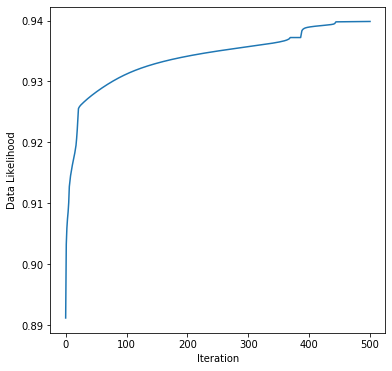

In [45]:
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

Percent Correct: Training 53.919869337688745 Testing 47.69555555555556

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 87.1 12.9  0    0    0    0    0    0    0    0     (4500 / 4500)
 2 | 39.8 40.5  3.4  0.3  9.3  0    0    0.0  6.6  0     (4500 / 4500)
 3 |  1.3  2.7 69.3  1.8  4.1 10.4  3.4  2.2  1.4  3.4   (4500 / 4500)
 4 |  1.6  4.5 14.2  7.4 17.9 16.9  8.1  4.8  5.9 18.9   (4500 / 4500)
 5 |  2.6  4.3 12.2  1.7 49.5  0.2  1.1  7.4 18.8  2.2   (4500 / 4500)
 6 |  0.4  0.2  0.4  0.1  0.4 76.2 19.0  0.9  0.2  2.2   (4500 / 4500)
 7 |  0.1  0.3  1.0  0.1  0.3 38.6 52.5  2.0  0.3  4.8   (4500 / 4500)
 8 |  0.2  3.0  6.8  1.8 10.4  1.1  3.5 26.1 42.8  4.2   (4500 / 4500)
 9 |  0.4  2.7  5.6  1.5 12.9  1.4  1.9 21.0 49.0  3.7   (4500 / 4500)
10 |  0.3  2.6  7.5  2.2 12.4  9.4 16.8 20.0  9.4 19.4   (4500 / 4500)
1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Sta

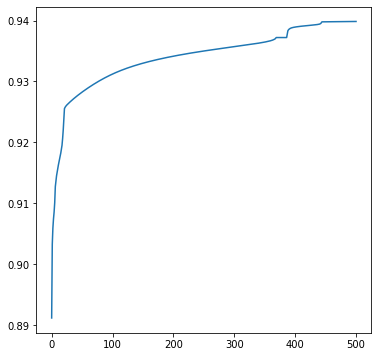

In [47]:
classes = np.unique(Ttest).astype(int)
Ptrain, Prtrain, _ = nnet.use(Xtrain, all_outputs=True)
Ptest, Prtest, _ = nnet.use(Xtest, all_outputs=True)
print('Percent Correct: Training', 100 * np.sum(Ptrain==Ttrain)/len(Ttrain),
      'Testing', 100 * np.sum(Ptest==Ttest)/len(Ttest))
print() 
ml.confusionMatrix(Ttest, Ptest,classes)
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(nnet.get_error_trace());

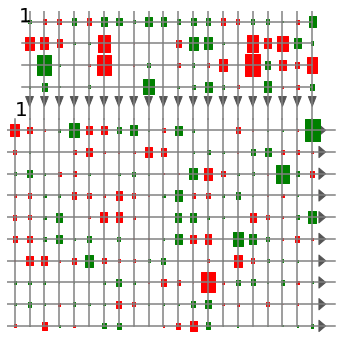

In [48]:
nnet.draw()

In [27]:
import scipy.signal as sig

def cwt(eeg,Fs,freqs,width,channelNames=None,graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None,None
    nChannels,nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = ['Channel {:2d}'.format(i) for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels, nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel',ch,' freq ',end='')
        for freqi in range(nFreqs):
            print(freqs[freqi],' ',end='')
            mag,phase = energyvec(freqs[freqi],eeg[ch,:],Fs,width)
            tfrepPhase[ch,freqi,:] = phase
            tfrep[ch,freqi,:] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs,f,width):
  ''' len = morletLength(Fs,f,width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f,s,Fs,width):
  '''
  function [y,phase] <- energyvec(f,s,Fs,width)
  function y <- energyvec(f,s,Fs,width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0/Fs
  sf = f/float(width)
  st = 1.0/(2*np.pi*sf)

  t = np.arange(-3.5*st,3.5*st,step=dt)
  m = morlet(f,t,width)
  # yconv = np.convolve(s,m,mode="same")
  yconv = sig.fftconvolve(s,m,mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet/2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal/2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary,deg=True)
  return y,phase

######################################################################
      
def morlet(f,t,width):
    '''
    function y <- morlet(f,t,width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)
    A = 1.0/np.sqrt(st*np.sqrt(2*np.pi))
    y = A*np.exp(-t**2/(2*st**2)) * np.exp(1j*2*np.pi*f*t)
    return y

In [28]:
import time
width = 75 
maxFreq = 20
freqs = np.arange(0.5,maxFreq,0.5) # makes same freqs used in stft above
start = time.time()
tfrep,tfrepPhase = cwt(data[:,1:].T, 75, freqs, width)
print('CWT time: {} seconds'.format(time.time() - start))

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 3.1228690147399902 seconds


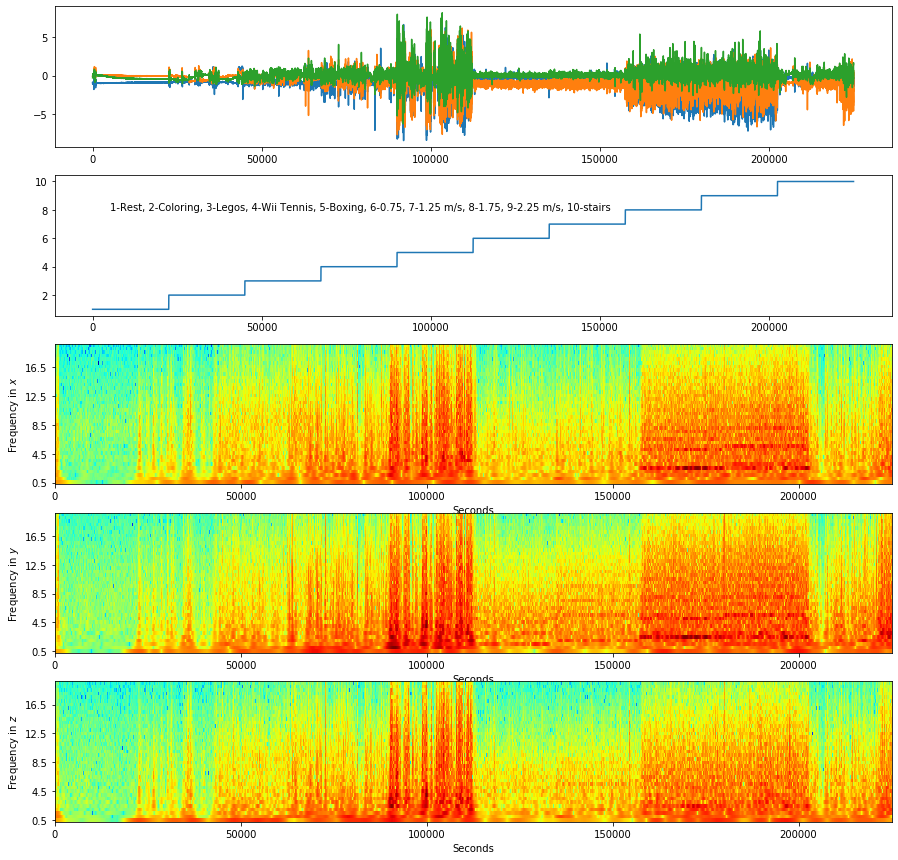

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
plt.plot(data[:,1:])
plt.axis('tight')

plt.subplot(5,1,2)
plt.plot(data[:,0])
plt.text(5000,8,'1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5,1,i+3)
    plt.imshow(np.log(tfrep[i,:,:]), 
               interpolation='nearest',origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$','$y$','$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [30]:
tfrep.shape

(3, 39, 225006)

In [31]:
X = tfrep.reshape((3*39,-1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [33]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, [0.8, 0.2], classification=True)

In [66]:
print(Xtrain.shape)
nnet = nn.NeuralNetworkClassifier(X.shape[1], [40, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
nnet.train(Xtrain, Ttrain, n_epochs = 100, verbose=True)

(180006, 117)
SCG: Iteration 10 ObjectiveF=0.88728 Scale=3.906e-09 Seconds=5.798
SCG: Iteration 20 ObjectiveF=0.89091 Scale=1.280e-04 Seconds=1.823
SCG: Iteration 30 ObjectiveF=0.92583 Scale=1.280e-04 Seconds=4.787
SCG: Iteration 40 ObjectiveF=0.93820 Scale=1.250e-07 Seconds=5.725
SCG: Iteration 50 ObjectiveF=0.94054 Scale=1.221e-10 Seconds=5.736
SCG: Iteration 60 ObjectiveF=0.94270 Scale=1.192e-13 Seconds=5.730
SCG: Iteration 70 ObjectiveF=0.94462 Scale=1.000e-15 Seconds=5.723
SCG: Iteration 80 ObjectiveF=0.94594 Scale=1.000e-15 Seconds=5.721
SCG: Iteration 90 ObjectiveF=0.94813 Scale=1.000e-15 Seconds=5.712
SCG: Iteration 100 ObjectiveF=0.94992 Scale=1.000e-15 Seconds=5.733


NeuralNetworkClassifier(117, [40, 40], [ 1  2  3  4  5  6  7  8  9 10], use_torch=False)
   Network was trained for 100 epochs that took 52.6965 seconds. Final objective value is 0.950

Percent Correct: Training 87.27709076364121 Testing 40.04222222222222

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 51.8 48.2  0    0    0    0    0    0    0    0     (4500 / 4500)
 2 |  0   14.4  0    0    0   25.8  0    0    0   59.7   (4500 / 4500)
 3 |  0    1.0  0   21.4  0    0.5 30.1  0    0   46.9   (4500 / 4500)
 4 |  0    0   13.1 55.4  8.7  0    0    0    0   22.8   (4500 / 4500)
 5 |  0    0    0    0   86.9  0    0    2.3  6.5  4.3   (4500 / 4500)
 6 |  9.7  0    0    0    0   39.5 50.8  0    0    0     (4500 / 4500)
 7 |  3.4  0    0    0    0    0   71.1  1.0  0   24.5   (4500 / 4500)
 8 |  0    0    0    3.1  4.7  0    0   54.9 37.4  0     (4500 / 4500)
 9 |  0    0    0   16.7  3.2  0    0   59.8 20.4  0     (4500 / 4500)
10 |  1.6  0    0    0   23.7  0   17.2 34.5 16.9  6.0   (4500 / 4500)
1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stai

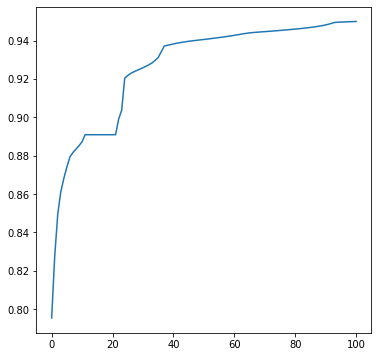

In [67]:
Ptrain, Prtrain, _ = nnet.use(Xtrain, all_outputs=True)
Ptest, Prtest, _ = nnet.use(Xtest, all_outputs=True)
print('Percent Correct: Training', 100 * np.sum(Ptrain==Ttrain)/len(Ttrain),
      'Testing', 100 * np.sum(Ptest==Ttest)/len(Ttest))
print()
classes = np.unique(Ttest).astype(int)
ml.confusionMatrix(Ttest, Ptest, classes)
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(nnet.get_error_trace());

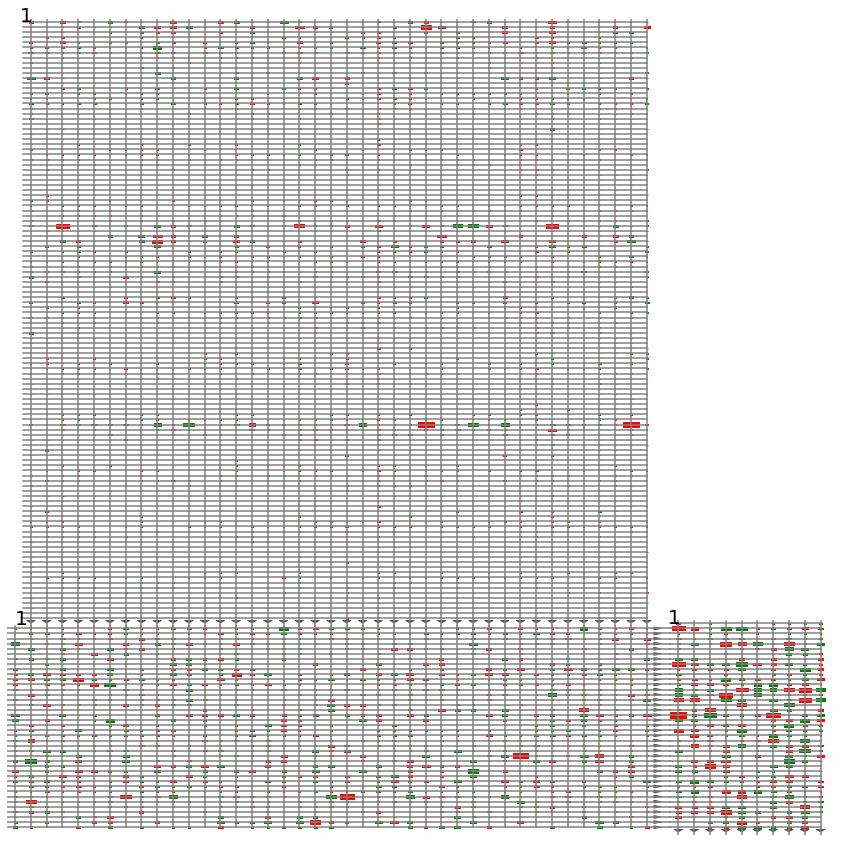

In [68]:
plt.figure(figsize=(15, 15))
nnet.draw()

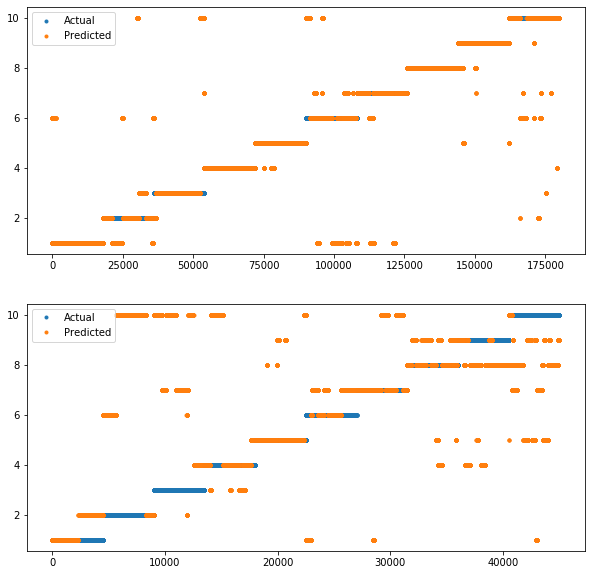

In [69]:
Ptrain, Prtrain, _ = nnet.use(Xtrain, all_outputs=True)
Ptest, Prtest, _ = nnet.use(Xtest, all_outputs=True)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(np.hstack((Ttrain, Ptrain)), '.')
plt.legend(('Actual', 'Predicted'))
plt.subplot(2, 1, 2)
plt.plot(np.hstack((Ttest, Ptest)), '.')
plt.legend(('Actual', 'Predicted'));